<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 5 - Hanson Nguyen

# **3.2 Continuity and Differentiation**


---

We can use python to solve calculus problems numerically. The calculus examples we demonstrate here have widepread applications in areas like machine learning. First, we can use the sympy library for analytical expressions of limits and derivatives. Alternatively, we can numerically solve for a derivative with the definition: $f'(x) = lim_{h→0}\frac{f(x + h) - f(x)}{h}$.

lim as x goes to 0:  oo


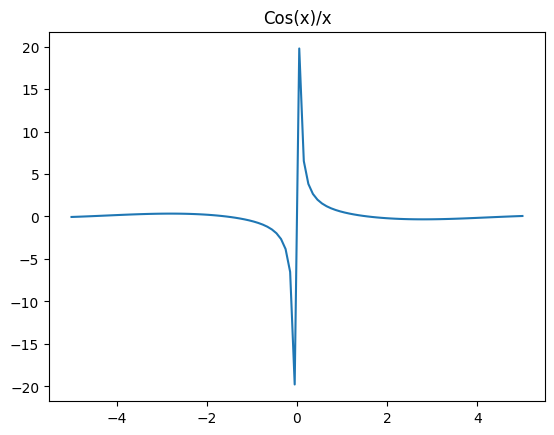

In [20]:
# The first example shows using sympy to get the limit at an undefined value for cos(x)/x

import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x = symbols('x')
function = cos(x)/x;
limit_function = limit(function, x, 0)
def func(x):
  return (np.cos(x)/x)

x_list = np.linspace(-5,5,100)
plt.plot(x_list, func(x_list))
plt.title('Cos(x)/x')
print('lim as x goes to 0: ', limit_function)

lim as x goes to 0:  1


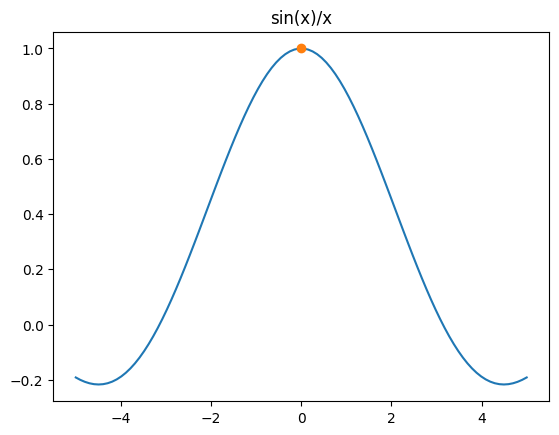

In [19]:
# The second example shows using sympy to get the limit at an undefined value for sin(x)/x

x = symbols('x')
function = sin(x)/x;
limit_function = limit(function, x, 0)
def func(x):
  return (np.sin(x)/x)

x_list = np.linspace(-5,5,100)
plt.plot(x_list, func(x_list))
plt.plot(0, limit_function, 'o')
plt.title('sin(x)/x')
print('lim as x goes to 0: ', limit_function)

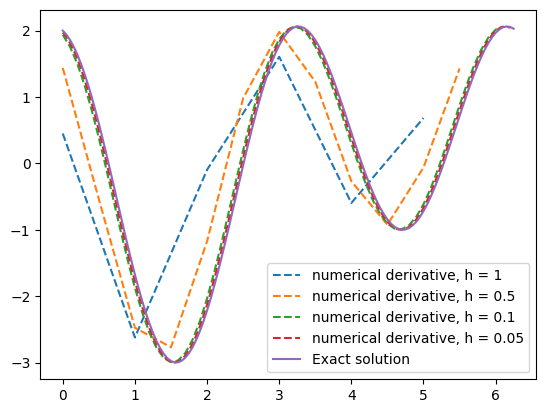

In [52]:
# numerically solve derivatives from https://pythonnumericalmethods.berkeley.edu/
# I demonstrate how decreasing the step sizes allows for better convergence to the actual derivative

h_list = [1, 0.5, 0.1, .05]
for h in h_list:                  # define different step sizes
  x = np.arange(0, 2*np.pi, h)    # define grid
  y = np.cos(x) + np.sin(2*x)     # compute function

  # the derivative is (f(x + h) - f(x) / h)
  deriv = np.diff(y)/h            # numerically solved derivative


  plt.plot(x[:-1], deriv, '--', label = 'numerical derivative, h = ' + str(h))

exact_solution = -np.sin(x) + 2*np.cos(2*x)   # analytically solved derivative
plt.plot(x, exact_solution,     label = 'Exact solution')

plt.legend()
plt.show()

Here, I want to generate the Jacobian, which is used in applications like machine learning for feedback. We define the Jacobian for $\mathbf{f} = \{f_1, \dots, f_m\}:D →\mathbb{R}^m$ for $D \subseteq \mathbb{R}^d$ as $J_f(x_0) = \begin{pmatrix}
\frac{\partial f_1(x_0)}{\partial x_1} & \dots & \frac{\partial f_1(x_0)}{\partial x_d}\\
\vdots & \ddots & \vdots\\
\frac{\partial f_m(x_0)}{\partial x_1} & \dots & \frac{\partial f_m(x_0)}{\partial x_d}
\end{pmatrix}$

In our example, we use $\mathbf{f} = \{x_2x_3, \sin(x_1\exp(x_2)), x_3\exp(x_2)\}$, so the Jacobian is
$J_f(x_0) =
\begin{pmatrix}
0 & x_3 & x_2\\
\exp(x_2)\cos(x_1\exp(x_2)) & x_1\exp(x_2)\cos(x_1\exp(x_2)) & 0\\
0 &  x_3\exp(x_2) & \exp(x_2)
\end{pmatrix}$

For $x_0 = \{1,1,1,1\}$, we obtain

$J_f(x_0) =
\begin{pmatrix}
0 & 1 & 1\\
\exp(1)\cos(\exp(1)) & \exp(1)\cos(\exp(1)) & 0\\
0 &  \exp(1) & \exp(1)
\end{pmatrix}$

In [72]:
# From https://aleksandarhaber.com/automatically-compute-jacobians-of-vector-functions-in-python-by-using-symbolic-library/#google_vignette
# We can use the sympy function to start generating Jacobians and Hessians

import numpy as np
from sympy import *

x=MatrixSymbol('x',3,1)

# here, we define our function f as column vector of 3 functions
f=Matrix([
          [x[1]*x[2]],
          [sin(x[0]*E**x[1])],
          [x[2]*E**(x[1])]
          ])

# here, we symbolically compute the Jacobian matrix, which should match above
JacobianSymbolic=f.jacobian(x)
print(JacobianSymbolic)

# we convert the symbolic representation into a numerical function
JacobianFunction=lambdify(x,JacobianSymbolic)

x_0=np.array([[1],[1],[1],[1]])

# here, we evaluate the numerical value of the Jacobian matrix
JacobianNumerical=JacobianFunction(x_0)

print(JacobianNumerical)

Matrix([[0, x[2, 0], x[1, 0]], [exp(x[1, 0])*cos(exp(x[1, 0])*x[0, 0]), exp(x[1, 0])*cos(exp(x[1, 0])*x[0, 0])*x[0, 0], 0], [0, exp(x[1, 0])*x[2, 0], exp(x[1, 0])]])
[[ 0.          1.          1.        ]
 [-2.47834973 -2.47834973  0.        ]
 [ 0.          2.71828183  2.71828183]]


# **3.2 Unconstrained Optimization**


---
We can define two minimizers that we aim to find for optimization problems:


1.   Global minimizer: $x^*$ is a global minimizer in $\mathbb{R}^d$ if $f(x) ≥f(x^*), ∀x \in \mathbb{R}^d$
2.   Local minimizer: $x^*$ is a local minimizer in $\mathbb{R}^d$ if $∃ \delta > 0$ such that $f(x) ≥f(x^*), ∀x \in B_\delta(x^*) \backslash \{x^*\}$

We can also use gradient descent as a numerical method to obtain local minimizers. We can find global minimizers of a convex function by finding the local minimizer of the convex function, defined as:

$f: \mathbb{R}^d → \mathbb{R}$ is a convex function if $\forall x,y \in \mathbb{R}^d$ and $\forall\alpha \in [0,1]$, $f(1-\alpha)x + \alpha y \leq (1-\alpha)x + \alpha y$

The gradient descent algorithm can be incorporated by using the steepest descent method: $x^{k+1} = x^k - \alpha_k\nabla f(x^k)$ for $k = 0,1,2,\dots$ if $\nabla f(x^k) \neq 0$. We use $\alpha_k = \arg min_{\alpha >0}f(x^k - \alpha_k\nabla f(x^k))$

Initial Guess:  [0, 0]
Function Value:  0.00012035425635764806 at x =  [0.98923513 0.97879761] in 533 iterations
For Tolerence Value:  1e-07


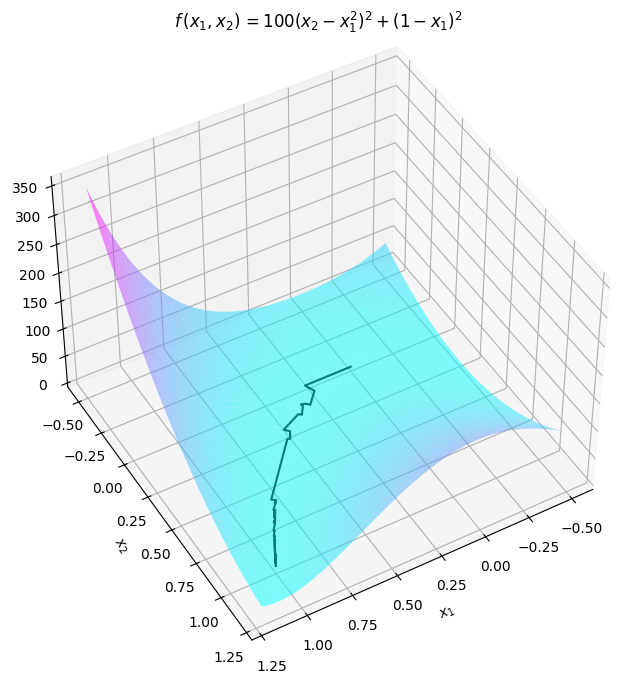

In [126]:
# From https://github.com/Ravi-IISc/Gradient-Descent-Algorithm-in-Python/blob/master/Gradient_Descent.ipynb

# We aim to find the minimum of a Rosenbrock Function using gradient descent
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import linalg as lp

# using the forward differences method, we can calculate the gradients
def grad(x):
    value = np.zeros(len(x))
    for j in range(len(x)):
      h = np.zeros(len(x))
      h[j] = 10**-6   # shift only one dimension
      value[j] = (rosenbrock_func(x+h) - rosenbrock_func(x))/1e-6
    return value

# Rosenbrock function is defined as (a-x)^2 + b(y-x^2)^2, with a minimum at (a,a^2)
# usually, a = 1, b = 100
def rosenbrock_func(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

#Using Back-Tracking line search method for best step size, which adapts the step size with the Armijo-Goldstein condition
def step_size(x):
    alpha = 1
    beta = 0.8
    while func(x - alpha*grad(x)) > (rosenbrock_func(x) - 0.5*alpha*lp.norm(grad(x))**2):
        alpha *= beta
    return alpha

x = [0, 0] #initialization for the iterations
x1 = np.array([])
x2 = np.array([])
tol = 10**-7 #Tolerence Value to stop the iteration loop
pre = -1e9
k = 0
print("Initial Guess: ", x)

#Gradient-Descent Algorithm
while abs(rosenbrock_func(x) - pre) > tol:
    pre = rosenbrock_func(x)
    x1 = np.append(x1, x[0])
    x2 = np.append(x2, x[1])
    alpha = step_size(x)
    x -= alpha*grad(x)  #Gradient-Descent Algorithm
    k += 1

print("Function Value: ", rosenbrock_func(x), "at x = ", x, "in", k, "iterations")
print("For Tolerence Value: ", tol)

fig = plt.figure(figsize=(10,8), dpi=100)
ax = plt.axes(projection='3d')

x = np.arange(-0.5, 1.2, 0.02)
y = np.arange(-0.5, 1.2, 0.02)
X, Y = np.meshgrid(x, y)
Z = 100*(Y - X**2)**2 + (1 - X)**2
z_graddes = 100*(x2 - x1**2)**2 + (1 - x1)**2
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.5)
ax.plot3D(x1, x2, z_graddes, 'black')
ax.view_init(45, 60)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$f\,(x_1, x_2) \,= 100(x_2 - x_1^2)^2 + (1 - x_1)^2 $")
plt.grid(True)

Initial Guess:  [-8.270696924951508, 0.07359465409535026]
Function Value:  0.0003884424545332945 at x =  [0.98066961 0.96209731] in 418 iterations
For Tolerence Value:  1e-07


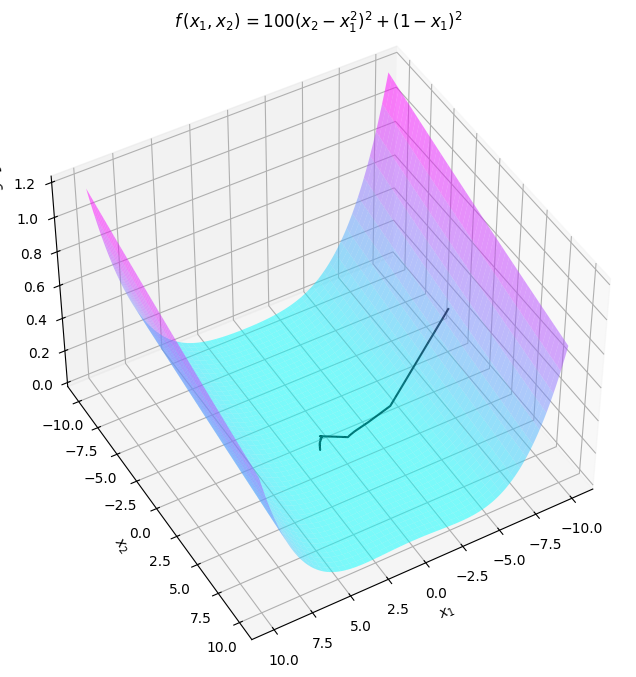

In [143]:
# same thing, but let's change the initial point
import random
x = [random.uniform(-10.0, 10.0), random.uniform(-10.0, 10.0)] #initialization
x1 = np.array([])
x2 = np.array([])
tol = 10**-7 #Tolerence Value
pre = -1e9
k = 0
print("Initial Guess: ", x)

#Gradient-Descent Algorithm
while abs(rosenbrock_func(x) - pre) > tol:
    pre = rosenbrock_func(x)
    x1 = np.append(x1, x[0])
    x2 = np.append(x2, x[1])
    alpha = step_size(x)
    x -= alpha*grad(x)
    k += 1

print("Function Value: ", rosenbrock_func(x), "at x = ", x, "in", k, "iterations")
print("For Tolerence Value: ", tol)

fig = plt.figure(figsize=(10,8), dpi=100)
ax = plt.axes(projection='3d')

x = np.arange(-10, 10, 0.02)
y = np.arange(-10, 10, 0.02)
X, Y = np.meshgrid(x, y)
Z = 100*(Y - X**2)**2 + (1 - X)**2
z_graddes = 100*(x2 - x1**2)**2 + (1 - x1)**2
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.5)
ax.plot3D(x1, x2, z_graddes, 'black')
ax.view_init(45, 60)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$f\,(x_1, x_2) \,= 100(x_2 - x_1^2)^2 + (1 - x_1)^2 $")
plt.grid(True)